In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
pd.options.display.max_colwidth = 3000

### 파일불러오기

In [4]:
lieb = pd.read_csv("../data/liebherr_news_list.csv")
lieb.shape

(820, 9)

### DataFrame 만들기

In [5]:
df = lieb[["type", "date", "링크", "제목"]]
df.head(3)

,type,date,링크,제목
0,Press releases,05/15/2023,https://www.liebherr.com/en/usa/latest-news/news-press-releases/detail/liebherr-presents-the-new-lh-26-m-timber-litronic-at-ligna-2023-in-hanover.html,Liebherr presents the new LH 26 M Timber Litronic at LIGNA 2023 in Hanover
1,Press releases,05/15/2023,https://www.liebherr.com/en/usa/latest-news/news-press-releases/detail/new-liebherr-l-580-loghandler-xpower-makes-its-debut-at-ligna-2023.html,New Liebherr L 580 LogHandler XPower® makes its début at Ligna 2023
2,Press releases,05/10/2023,https://www.liebherr.com/en/usa/latest-news/news-press-releases/detail/iso-limited-and-liebherr-advance-new-zealand-timber.html,ISO Limited and Liebherr advance New Zealand timber


In [9]:
df["contents"] = lieb["토픽"] + lieb["중요"] + lieb["내용"]
df.head(1)

C:\Users\chjy1\AppData\Local\Temp\ipykernel_5156\1840142614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["contents"] = lieb["토픽"] + lieb["중요"] + lieb["내용"]


,type,date,링크,제목,contents
0,Press releases,05/15/2023,https://www.liebherr.com/en/usa/latest-news/news-press-releases/detail/liebherr-presents-the-new-lh-26-m-timber-litronic-at-ligna-2023-in-hanover.html,Liebherr presents the new LH 26 M Timber Litronic at LIGNA 2023 in Hanover,"Powerful machine for efficient timber handling. Thanks to its compact design, it is ideal for use in sawmills and lumber yards with limited space. The new addition is the smallest machine in Liebherr's existing portfolio of material handlers in the 25-tonne rangeLiebherr will unveil the new LH 26 M Timber Litronic for efficient timber handling at the world's leading trade fair LIGNA in Hanover. Thanks to its extremely compact design and exceptional manoeuvrability, this specialist machine is ideal for use in sawmills and lumber yards where space is at a premium. The new handling machine also boasts impressively low fuel consumption when operating at maximum capacity. Liebherr will also demonstrate its new integrated tyre pressure monitoring system on the material handler for the first time. With the LH 26 M Timber Litronic, Liebherr will present a new timber truck to the public at LIGNA that extends its existing portfolio to include a lighter machine with an operating mass of between 23,500 and 26,000 kg. Liebherr will also showcase its new, integrated tyre pressure monitoring system as part of its trade fair exhibit. This system allows the desired target tyre pressure to be set and monitored on the display in the operator's cab. The system will be optionally available for Liebherr material handlers from October.Liebherr's trade fair exhibit also includes a straight 6.6 m long boom and a 5 m long stick with an angled stick end as well as a Liebherr type GM 10B wood grapple with a capacity of up to 1.30 m². The machine configuration also includes the 1.2 m high, rigid cab elevation LFC 120 for optimum visibility and a 3 m wide support blade at the rear. Maximum splash protection is provided thanks to the hot-dip galvanised mudguards, which also serve as a platform for easy and safe access to the operator's cab.The new machine combines high driving performance with compact dimensionsThe engine power of 125 kW / 170 hp provides the system with a large amount of torque, which allows the machine to accelerate quickly. In combination with the high pump flow, this guarantees fast, dynamic work movements and therefore maximum handling capacity.Thanks to its compact design, the new machine is ideal for use in confined spaces. It’s extremely small front and tail swing radius enables the machine to turn around completely even in very narrow operating locations. The minimal contours of the right front side enable the machine to work very close to sorting lines or timber stacks as it is always within the width of the undercarriage. This ensures an excellent view of the working area, ensures additional safety and prevents collisions.Four-wheel steering for greater manoeuvrability and integrated tyre pressure monitoring systemTo ensure excellent manoeuvrability and agility, the LH 26 M Timber is equipped with four-wheel steering as standard. The four-wheel steering increases driving stability and thus improves the machine's directional stability. The automa..."


# EDA

In [10]:
lieb.isnull().sum()

제목        2
날짜        0
링크        0
요약        1
type      0
date      0
토픽      358
중요      166
내용        2
dtype: int64

In [11]:
df.isnull().sum()

type          0
date          0
링크            0
제목            2
contents    370
dtype: int64

### null 값 왜이런지 확인
- lieb 의 nan 값들을 '' 로 채우고 진행하자

In [12]:
lieb.loc[lieb["제목"].isnull()]

,제목,날짜,링크,요약,type,date,토픽,중요,내용
365,NaN,News |06/03/2022,https://www.liebherr.com/en/usa/latest-news/news-press-releases/detail/news_246272.html?page=37,Find out more,News,06/03/2022,NaN,NaN,NaN
685,NaN,News |04/06/2021,https://www.liebherr.com/en/usa/latest-news/news-press-releases/detail/news_191488.html?page=69,Find out more,News,04/06/2021,NaN,NaN,NaN


In [13]:
lieb = lieb.loc[~lieb["제목"].isnull()]
lieb.isnull().sum()

제목        0
날짜        0
링크        0
요약        1
type      0
date      0
토픽      356
중요      164
내용        0
dtype: int64

In [14]:
lieb = lieb.fillna("")
lieb.isnull().sum()

제목      0
날짜      0
링크      0
요약      0
type    0
date    0
토픽      0
중요      0
내용      0
dtype: int64

In [15]:
df = lieb[["type", "date", "링크", "제목"]].copy()
df["contents"] = lieb["토픽"] + lieb["중요"] + lieb["내용"]
df.isnull().sum()

type        0
date        0
링크          0
제목          0
contents    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 819
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      818 non-null    object
 1   date      818 non-null    object
 2   링크        818 non-null    object
 3   제목        818 non-null    object
 4   contents  818 non-null    object
dtypes: object(5)
memory usage: 38.3+ KB


In [17]:
df.describe()

,type,date,링크,제목,contents
count,818,818,818,818,818
unique,4,446,816,815,816
top,Press releases,10/24/2022,https://www.liebherr.com/en/usa/latest-news/news-press-releases/detail/liebherr-earthmoving-and-material-handling-machines-at-svenska-maskinmassan-2022.html?page=37,Digital clearance monitoring for slewing bearings,"Liebherr presents four wheel loaders including the new compact loader L 508. Liebherr also showcases its compact wheeled excavator A 913 Compact Litronic and A 916 Compact Litronic. Besides that, Liebherr is represented by its Generation 8 crawler excavators and dozers as well as telescopic handlers for heavy industrial applications and material handling machines for efficient recycling operations. Also presented to the Swedish trade audience: the TA 230 Litronic articulated dump truckThe Svenska Maskinmässan, a trade fair for construction machines, takes place in Stockholm (Sweden) from 2 to 4 June 2022. There, Liebherr presents an extensive range of earthmoving and material handling machines on an area of 2,000 m². Visitors to the exhibition find the Liebherr booth in the outdoor area V:09 Solvalla in the Stockholm district of Bromma. Besides a static machine exhibition, visitors to the fair can also look forward to a demonstration area where some of the machines can be seen live in action.Liebherr is exhibiting numerous earthmoving and material handling machines for a wide range of applications at the Svenska Maskinmässan fair. With the L 508 Compact, the L 556 XPower®, the L 586 XPower® and the L 509 Tele, Liebherr is exhibiting four of its wheel loader models. Also on display are two representatives of the Liebherr compact wheeled excavators, the A 913 Compact and A 916 Compact, along with a number of Generation 8 crawler excavators. Furthermore, the TA 230 Litronic articulated dump truck is presented to the Swedish trade audience. Besides that, Liebherr is presenting two material handling machines for various operations in the field of recycling and waste management, the LH 18 M Industry Litronic and the LH 26 M Industry E. A telescopic handler and a dozer round off the range at the show.. Four wheel loaders at the Liebherr booth and trade fair premiere of model L 508 CompactAt Svenska Maskinmässan, Liebherr is presenting four wheel loaders with operating weights between 5,700 kg and 32,600 kg. The L 508 Compact, making its trade fair premiere, is the largest model in the new Liebherr compact loader series introduced this year. The most important innovations include the redesigned operator's cab, which provides the operator with excellent visibility thanks to its generous use of glass. The optimised visibility of the lift arms also ensures an unobstructed view of the working attachment and therefore maximum safety. For the first time ever, the L 506 and L 508 models are now available as speeder variants. In this version, they can reach a top speed of 30 km/h. In addition, Liebherr expands the compact loader series with the new L 504 model.. In addition, Liebherr is showing two models from its large wheel loader series, the L 556 XPower® and the L 586 XPower®. Liebherr fits a power-split driveline as standard for these wheel loaders. It combines hydrostatic drive, which is ideal for material uptake and travelling over short distances, wi..."
freq,531,27,2,2,2


### date 타입변경

In [18]:
df["date"] = pd.to_datetime(df["date"].copy())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 819
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   type      818 non-null    object        
 1   date      818 non-null    datetime64[ns]
 2   링크        818 non-null    object        
 3   제목        818 non-null    object        
 4   contents  818 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 38.3+ KB


In [20]:
df.type.value_counts()

Press releases    531
News              273
Listicle           12
Press Kit           2
Name: type, dtype: int64

In [21]:
df["contents"].values[0].split(". ")

['Powerful machine for efficient timber handling',
 'Thanks to its compact design, it is ideal for use in sawmills and lumber yards with limited space',
 "The new addition is the smallest machine in Liebherr's existing portfolio of material handlers in the 25-tonne rangeLiebherr will unveil the new LH 26 M Timber Litronic for efficient timber handling at the world's leading trade fair LIGNA in Hanover",
 'Thanks to its extremely compact design and exceptional manoeuvrability, this specialist machine is ideal for use in sawmills and lumber yards where space is at a premium',
 'The new handling machine also boasts impressively low fuel consumption when operating at maximum capacity',
 'Liebherr will also demonstrate its new integrated tyre pressure monitoring system on the material handler for the first time',
 'With the LH\xa026\xa0M Timber Litronic, Liebherr will present a new timber truck to the public at LIGNA that extends its existing portfolio to include a lighter machine with an o

In [22]:
text = df["contents"].values[0]
text

"Powerful machine for efficient timber handling. Thanks to its compact design, it is ideal for use in sawmills and lumber yards with limited space. The new addition is the smallest machine in Liebherr's existing portfolio of material handlers in the 25-tonne rangeLiebherr will unveil the new LH 26 M Timber Litronic for efficient timber handling at the world's leading trade fair LIGNA in Hanover. Thanks to its extremely compact design and exceptional manoeuvrability, this specialist machine is ideal for use in sawmills and lumber yards where space is at a premium. The new handling machine also boasts impressively low fuel consumption when operating at maximum capacity. Liebherr will also demonstrate its new integrated tyre pressure monitoring system on the material handler for the first time. With the LH\xa026\xa0M Timber Litronic, Liebherr will present a new timber truck to the public at LIGNA that extends its existing portfolio to include a lighter machine with an operating mass of be

## 텍스트 전처리

### 문장으로 만들기

In [105]:
# ???
# df = df[:-1]

In [23]:
df["sentenses"] = df["contents"].map(lambda x : x.split(". "))
df["sentenses"].tail(1)

819    [Liebherr USA Mining is pleased to announce the addition of Lincoln Klemola, In his role as Manager of Field Services, Lincoln will oversee and manage customer support for Liebherr Mining machines in the U.S, He will serve as the primary service contact for Liebherr Mining customers within the U.S., lead the entire service and support team, and expand on Liebherr’s current growth strategy for the U.S, market.Lincoln has more than 20 years experience in the mining industry, Thoughout his career, he has held previous positions such as: Technical Trainer of large mining equipment, Field Service Technician of large diesel electric mining equipment and most recently, Service Manager for a large industrial machinery and equipment distributor.His extensive experience and accomplishments encompasses all areas of the supplier business, From increasing profitability of diverse product lines, leading customer service teams and service technicians in service and repair of mining equipment, 

### 단어로 만들기

In [24]:
df["words"] = df["contents"].replace("\.|\,|:", "", regex=True).map(lambda x : x.split(" "))
df["words"][:10]

0                                                                    [Powerful, machine, for, efficient, timber, handling, Thanks, to, its, compact, design, it, is, ideal, for, use, in, sawmills, and, lumber, yards, with, limited, space, The, new, addition, is, the, smallest, machine, in, Liebherr's, existing, portfolio, of, material, handlers, in, the, 25-tonne, rangeLiebherr, will, unveil, the, new, LH, 26, M, Timber, Litronic, for, efficient, timber, handling, at, the, world's, leading, trade, fair, LIGNA, in, Hanover, Thanks, to, its, extremely, compact, design, and, exceptional, manoeuvrability, this, specialist, machine, is, ideal, for, use, in, sawmills, and, lumber, yards, where, space, is, at, a, premium, The, new, handling, machine, also, boasts, impressively, low, fuel, ...]
1                                [Liebherr, L 580, LogHandler, XPower®, as, special, wheel, loader, for, handling, logs, Power-split, travel, drive, increases, productivity, new, lift, arms, and, optimis

### 불용어

In [62]:
# 불용어
stop_words = ["a"          ,"but"        , "during"     ,"hows"      , "it's"    , "said"     ,     "this"       ,"we’re"      ,"who’ve"  
,"about"      ,"by"         , "each"       ,"however"   , "it’s"    , "says"     ,     "those"      ,"we've"      ,"whove"   
,"above"      ,"can"        , "either"     ,"i"         , "its"     , "see"      ,     "through"    ,"we’ve"      ,"will"    
,"across"     ,"can't"      , "for"        ,"i'd"       , "let's"   , "she"      ,     "to"         ,"weve"       ,"with"    
,"after"      ,"can’t"      , "from"       ,"i’d"       , "let’s"   , "she'd"    ,     "too"        ,"were"       ,"within"  
,"all"        ,"cant"       , "given"      ,"i'll"      , "lets"    , "she’d"    ,     "towards"    ,"what"       ,"without" 
,"along"      ,"cannot"     , "had"        ,"i’ll"      , "may"     , "shed"     ,     "under"      ,"what's"     ,"won't"   
,"also"       ,"could"      , "has"        ,"i'm"       , "me"      , "she'll"   ,     "until"      ,"what’s"     ,"won’t"   
,"am"         ,"couldn't"   , "have"       ,"i’m"       , "more"    , "she’ll"   ,     "us"         ,"whats"      ,"would"   
,"an"         ,"couldn’t"   , "having"     ,"im"        , "most"    , "shell"    ,     "use"        ,"when"       ,"wouldn't"
,"and"        ,"couldnt"    , "he"         ,"i've"      , "much"    , "should"   ,     "used"       ,"when's"     ,"wouldn’t"
,"any"        ,"did"        , "he'd"       ,"i’ve"      , "must"    , "since"    ,     "uses"       ,"when’s"     ,"you"     
,"are"        ,"didn't"     , "he’d"       ,"ive"       , "my"      , "so"       ,     "using"      ,"whens"      ,"you'd"   
,"aren't"     ,"didn’t"     , "hed"        ,"if"        , "no"      , "some"     ,     "very"       ,"where"      ,"you’d"   
,"aren’t"     ,"didnt"      , "he'll"      ,"in"        , "not"     , "such"     ,     "want"       ,"whether"    ,"youd"    
,"arent"      ,"do"         , "he’ll"      ,"instead"   , "now"     , "than"     ,     "was"        ,"which"      ,"you'll"  
,"as"         ,"does"       , "her"        ,"into"      , "of"      , "that"     ,     "wasn't"     ,"while"      ,"you’ll"  
,"at"         ,"doesn't"    , "here"       ,"is"        , "on"      , "the"      ,     "wasn’t"     ,"who"        ,"youll"   
,"be"         ,"doesn’t"    , "hers"       ,"isn't"     , "one"     , "their"    ,     "wasnt"      ,"who'll"     ,"you're"  
,"because"    ,"doesnt"     , "him"        ,"isn’t"     , "only"    , "them"     ,     "we"         ,"who’ll"     ,"you’re"  
,"been"       ,"doing"      , "himself"    ,"isnt"      , "or"      , "then"     ,     "we'd"       ,"wholl"      ,"youre"   
,"before"     ,"done"       , "his"        ,"it"        , "other"   , "there"    ,     "we’d"       ,"who's"      ,"you've"  
,"being"      ,"don't"      , "how"        ,"it'll"     , "our"     , "therefore",     "we'll"      ,"who’s"      ,"you’ve"  
,"between"    ,"don’t"      , "how's"      ,"it’ll"     , "out"     , "these"    ,     "we’ll"      ,"whos"       ,"youve"   
,"both"       ,"dont"       , "how’s"      ,"itll"      , "over"    , "they"     ,     "we're"      ,"who've"     ,"your"    
,"customer", "machine", "Liebherr's", "Liebherr"]

### 불용어 제거

In [26]:
df["words"][:1]

0    [Powerful, machine, for, efficient, timber, handling, Thanks, to, its, compact, design, it, is, ideal, for, use, in, sawmills, and, lumber, yards, with, limited, space, The, new, addition, is, the, smallest, machine, in, Liebherr's, existing, portfolio, of, material, handlers, in, the, 25-tonne, rangeLiebherr, will, unveil, the, new, LH, 26, M, Timber, Litronic, for, efficient, timber, handling, at, the, world's, leading, trade, fair, LIGNA, in, Hanover, Thanks, to, its, extremely, compact, design, and, exceptional, manoeuvrability, this, specialist, machine, is, ideal, for, use, in, sawmills, and, lumber, yards, where, space, is, at, a, premium, The, new, handling, machine, also, boasts, impressively, low, fuel, ...]
Name: words, dtype: object

In [43]:
# 테스트
result = []
for w in df["words"][:1][0]: 
    if w.casefold() not in stop_words: 
        result.append(w)
print(len(df["words"][:1][0]), len(result[0]))
print(result)

753 8
['Powerful', 'efficient', 'timber', 'handling', 'Thanks', 'compact', 'design', 'ideal', 'sawmills', 'lumber', 'yards', 'limited', 'space', 'new', 'addition', 'smallest', "Liebherr's", 'existing', 'portfolio', 'material', 'handlers', '25-tonne', 'rangeLiebherr', 'unveil', 'new', 'LH', '26', 'M', 'Timber', 'Litronic', 'efficient', 'timber', 'handling', "world's", 'leading', 'trade', 'fair', 'LIGNA', 'Hanover', 'Thanks', 'extremely', 'compact', 'design', 'exceptional', 'manoeuvrability', 'specialist', 'ideal', 'sawmills', 'lumber', 'yards', 'space', 'premium', 'new', 'handling', 'boasts', 'impressively', 'low', 'fuel', 'consumption', 'operating', 'maximum', 'capacity', 'Liebherr', 'demonstrate', 'new', 'integrated', 'tyre', 'pressure', 'monitoring', 'system', 'material', 'handler', 'first', 'time', 'LH\xa026\xa0M', 'Timber', 'Litronic', 'Liebherr', 'present', 'new', 'timber', 'truck', 'public', 'LIGNA', 'extends', 'existing', 'portfolio', 'include', 'lighter', 'operating', 'mass', '

# 워드클라우드

### 테스트
- 하나의 기사로만 테스트 한 것
- https://wikidocs.net/28400

In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=1200, height=850, background_color="white", random_state=0, font_path=r'c:\Windows\Fonts\malgun.ttf')

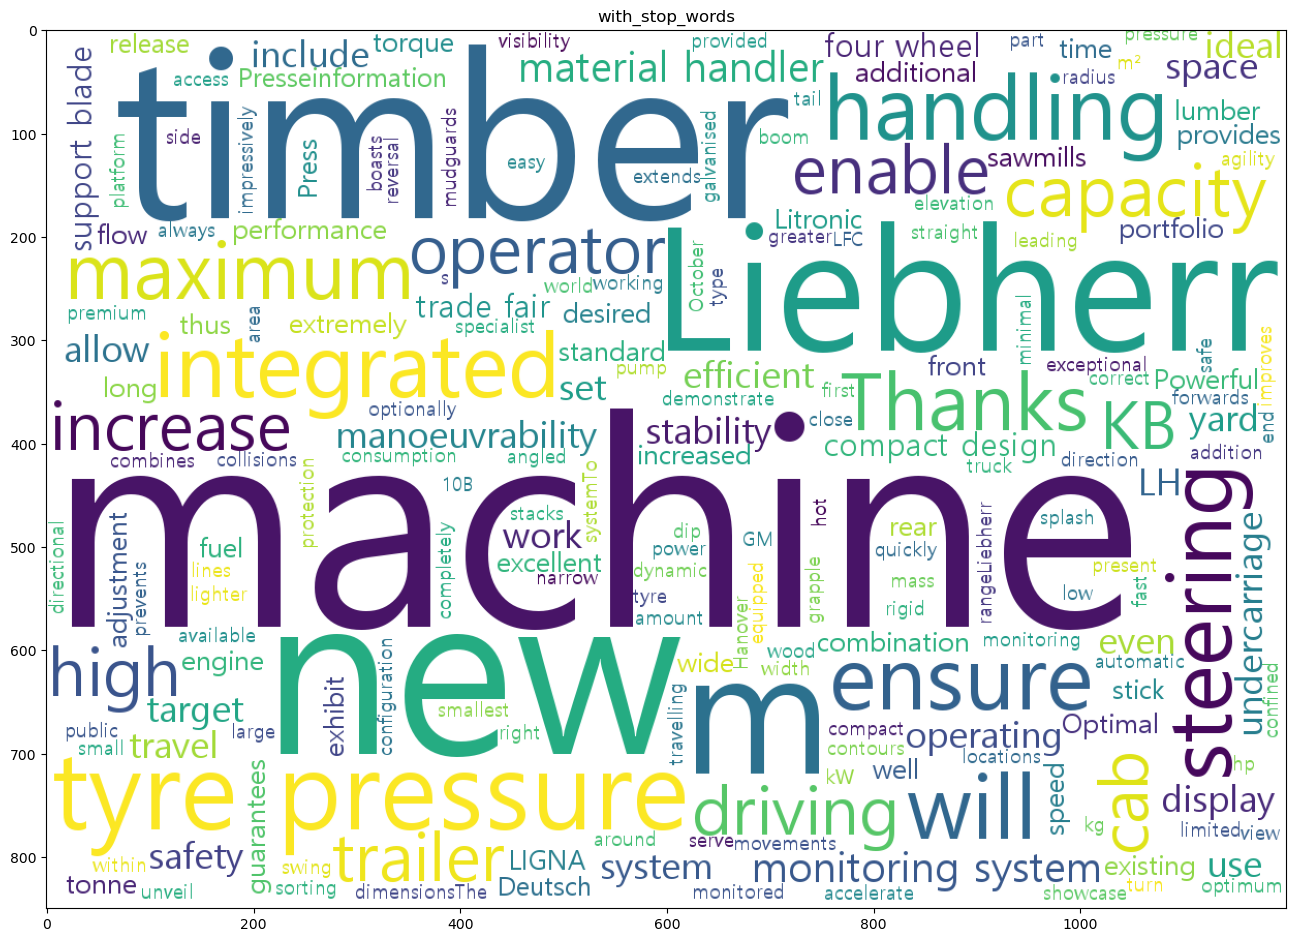

In [46]:
plt.figure(figsize=(16, 12))
plt.title("with_stop_words")
plt.imshow(wc.generate(text))

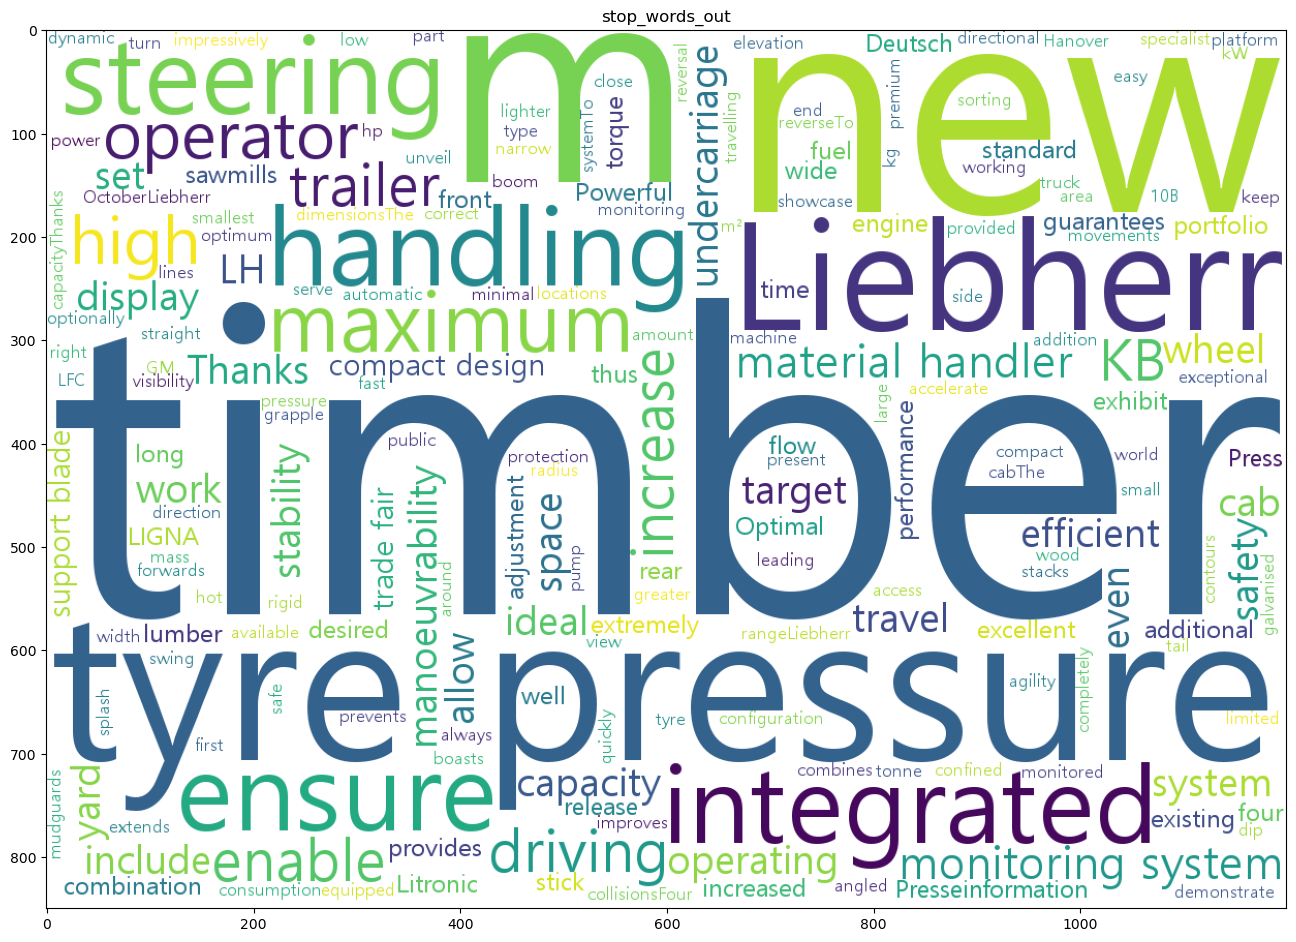

In [47]:
plt.figure(figsize=(16, 12))
plt.title("stop_words_out")
plt.imshow(wc.generate(" ".join(result)))

### 6개월

In [48]:
minimum = df.loc[df["date"] > '2022-11-01']
minimum.shape

(191, 7)

In [49]:
def stop_words_out(words):
    result = []
    for w in words: 
        if w.casefold() not in stop_words: 
            result.append(w)
    return " ".join(result).split("Downloads")[0]

In [50]:
stop_words_out(minimum["words"][0])

"Powerful efficient timber handling Thanks compact design ideal sawmills lumber yards limited space new addition smallest Liebherr's existing portfolio material handlers 25-tonne rangeLiebherr unveil new LH 26 M Timber Litronic efficient timber handling world's leading trade fair LIGNA Hanover Thanks extremely compact design exceptional manoeuvrability specialist ideal sawmills lumber yards space premium new handling boasts impressively low fuel consumption operating maximum capacity Liebherr demonstrate new integrated tyre pressure monitoring system material handler first time LH\xa026\xa0M Timber Litronic Liebherr present new timber truck public LIGNA extends existing portfolio include lighter operating mass 23500 26000\xa0kg Liebherr showcase new integrated tyre pressure monitoring system part trade fair exhibit system allows desired target tyre pressure set monitored display operator's cab system optionally available Liebherr material handlers OctoberLiebherr's trade fair exhibit i

In [51]:
minimum["clear_words_str"] = minimum["words"].map(stop_words_out)

C:\Users\chjy1\AppData\Local\Temp\ipykernel_5156\1800964583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minimum["clear_words_str"] = minimum["words"].map(stop_words_out)


In [52]:
len(minimum["clear_words_str"][0])

3415

In [53]:
len(" ".join(list(minimum["clear_words_str"])))

421206

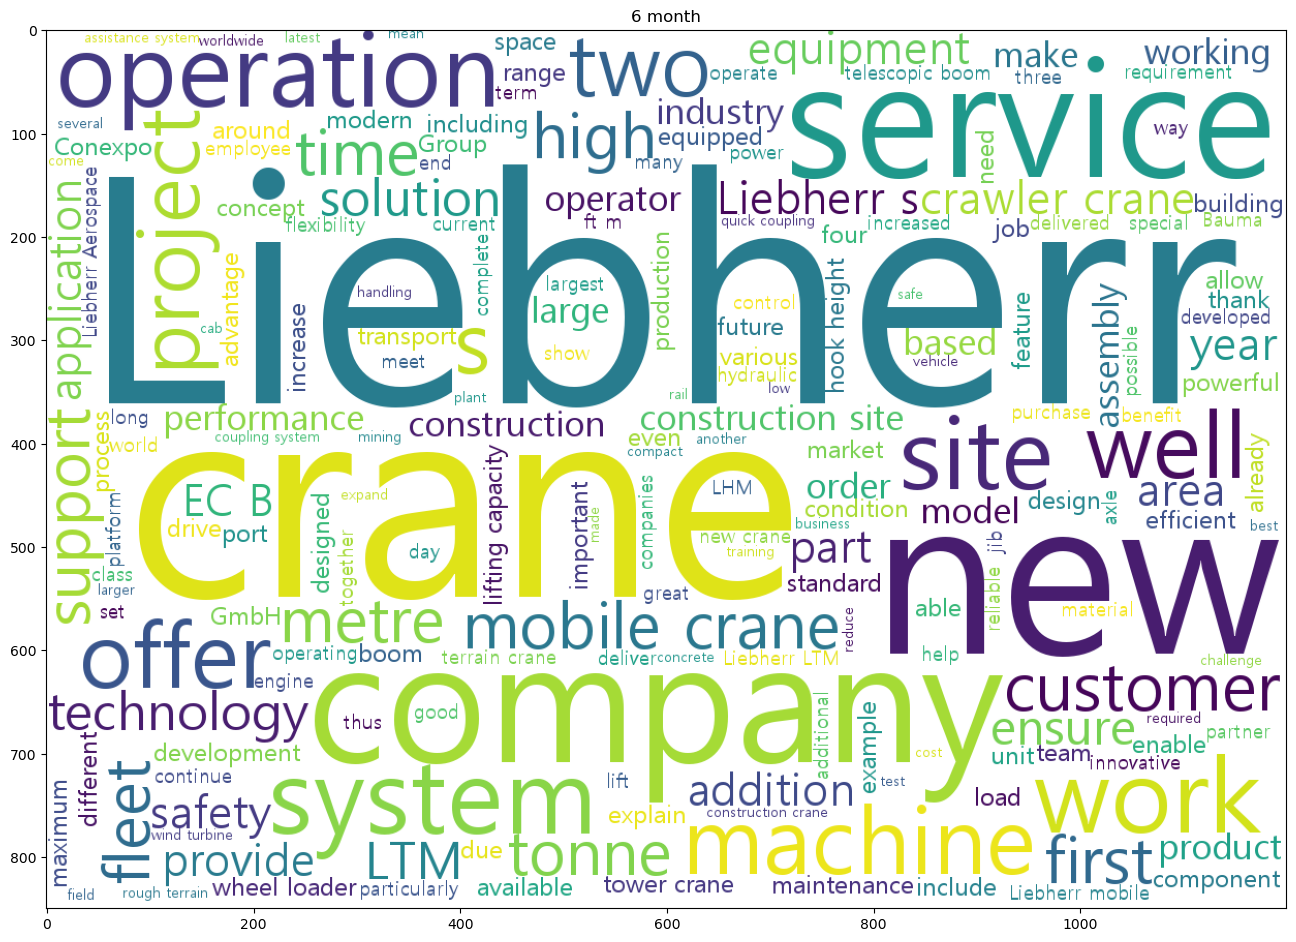

In [54]:
plt.figure(figsize=(16, 12))
plt.title("6 month")
plt.imshow(wc.generate(" ".join(list(minimum["clear_words_str"]))))

In [65]:
# 6개월치 전처리 데이터 저장
minimum.to_csv("../data/liebherr_6month.csv", index=False)

In [67]:
# pd.read_csv("../data/liebherr_6month.csv")

## 많이 등장하는 단어?
- 많이 등장한다고 중요한 단어일까?

In [55]:
minimum["clear_words"] = minimum["clear_words_str"].map(lambda s : s.split())
minimum["clear_words"]

C:\Users\chjy1\AppData\Local\Temp\ipykernel_5156\3418714324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minimum["clear_words"] = minimum["clear_words_str"].map(lambda s : s.split())


0                                                                                             [Powerful, efficient, timber, handling, Thanks, compact, design, ideal, sawmills, lumber, yards, limited, space, new, addition, smallest, Liebherr's, existing, portfolio, material, handlers, 25-tonne, rangeLiebherr, unveil, new, LH, 26, M, Timber, Litronic, efficient, timber, handling, world's, leading, trade, fair, LIGNA, Hanover, Thanks, extremely, compact, design, exceptional, manoeuvrability, specialist, ideal, sawmills, lumber, yards, space, premium, new, handling, boasts, impressively, low, fuel, consumption, operating, maximum, capacity, Liebherr, demonstrate, new, integrated, tyre, pressure, monitoring, system, material, handler, first, time, LH, 26, M, Timber, Litronic, Liebherr, present, new, timber, truck, public, LIGNA, extends, existing, portfolio, include, lighter, operating, mass, 23500, 26000, kg, Liebherr, showcase, new, integrated, ...]
1                                      

In [56]:
minimum["clear_words"]

0                                                                                             [Powerful, efficient, timber, handling, Thanks, compact, design, ideal, sawmills, lumber, yards, limited, space, new, addition, smallest, Liebherr's, existing, portfolio, material, handlers, 25-tonne, rangeLiebherr, unveil, new, LH, 26, M, Timber, Litronic, efficient, timber, handling, world's, leading, trade, fair, LIGNA, Hanover, Thanks, extremely, compact, design, exceptional, manoeuvrability, specialist, ideal, sawmills, lumber, yards, space, premium, new, handling, boasts, impressively, low, fuel, consumption, operating, maximum, capacity, Liebherr, demonstrate, new, integrated, tyre, pressure, monitoring, system, material, handler, first, time, LH, 26, M, Timber, Litronic, Liebherr, present, new, timber, truck, public, LIGNA, extends, existing, portfolio, include, lighter, operating, mass, 23500, 26000, kg, Liebherr, showcase, new, integrated, ...]
1                                      

- 기사 하나로 테스트 해보자

In [57]:
histogram = {}  

for word in minimum["clear_words"][0]: 
    histogram[word] = histogram.get(word, 0) + 1 
print(histogram)

{'Powerful': 1, 'efficient': 3, 'timber': 6, 'handling': 5, 'Thanks': 2, 'compact': 4, 'design': 3, 'ideal': 3, 'sawmills': 2, 'lumber': 2, 'yards': 2, 'limited': 1, 'space': 2, 'new': 9, 'addition': 1, 'smallest': 1, "Liebherr's": 2, 'existing': 2, 'portfolio': 2, 'material': 4, 'handlers': 2, '25-tonne': 1, 'rangeLiebherr': 1, 'unveil': 1, 'LH': 3, '26': 3, 'M': 3, 'Timber': 3, 'Litronic': 2, "world's": 1, 'leading': 1, 'trade': 3, 'fair': 3, 'LIGNA': 2, 'Hanover': 1, 'extremely': 2, 'exceptional': 1, 'manoeuvrability': 3, 'specialist': 1, 'premium': 1, 'boasts': 1, 'impressively': 1, 'low': 1, 'fuel': 2, 'consumption': 1, 'operating': 3, 'maximum': 3, 'capacity': 3, 'Liebherr': 5, 'demonstrate': 1, 'integrated': 5, 'tyre': 9, 'pressure': 8, 'monitoring': 5, 'system': 7, 'handler': 2, 'first': 1, 'time': 1, 'present': 1, 'truck': 1, 'public': 1, 'extends': 1, 'include': 1, 'lighter': 1, 'mass': 1, '23500': 1, '26000': 1, 'kg': 1, 'showcase': 1, 'part': 1, 'exhibit': 2, 'allows': 2, '

In [58]:

data = {"word":histogram.keys(), "count":histogram.values()}
test_count = pd.DataFrame.from_dict(data)
test_count

,word,count
0,Powerful,1
1,efficient,3
2,timber,6
3,handling,5
4,Thanks,2
...,...,...
275,cycle,1
276,increase,1
277,productivity,1
278,clearing,1


In [59]:
test_count = test_count.set_index("word")
test_count

,count
word,
Powerful,1
efficient,3
timber,6
handling,5
Thanks,2
...,...
cycle,1
increase,1
productivity,1


In [61]:
test_count.loc[test_count["count"] > 3]

,count
word,
timber,6
handling,5
compact,4
new,9
material,4
Liebherr,5
integrated,5
tyre,9
pressure,8


In [71]:
# 6개월치
histogram_6month = {}  

for words in minimum["clear_words"]: 
    for word in words:
        histogram_6month[word] = histogram_6month.get(word, 0) + 1 

print(histogram_6month)

{'Powerful': 3, 'efficient': 60, 'timber': 34, 'handling': 99, 'Thanks': 25, 'compact': 51, 'design': 75, 'ideal': 35, 'sawmills': 3, 'lumber': 4, 'yards': 4, 'limited': 17, 'space': 52, 'new': 457, 'addition': 85, 'smallest': 4, "Liebherr's": 57, 'existing': 34, 'portfolio': 40, 'material': 73, 'handlers': 8, '25-tonne': 1, 'rangeLiebherr': 1, 'unveil': 1, 'LH': 26, '26': 13, 'M': 28, 'Timber': 8, 'Litronic': 48, "world's": 8, 'leading': 19, 'trade': 24, 'fair': 18, 'LIGNA': 6, 'Hanover': 3, 'extremely': 23, 'exceptional': 12, 'manoeuvrability': 10, 'specialist': 9, 'premium': 4, 'boasts': 4, 'impressively': 2, 'low': 37, 'fuel': 65, 'consumption': 18, 'operating': 60, 'maximum': 111, 'capacity': 126, 'Liebherr': 1015, 'demonstrate': 10, 'integrated': 33, 'tyre': 13, 'pressure': 46, 'monitoring': 27, 'system': 244, 'handler': 14, 'first': 139, 'time': 104, 'present': 13, 'truck': 34, 'public': 16, 'extends': 6, 'include': 38, 'lighter': 6, 'mass': 4, '23500': 2, '26000': 2, 'kg': 3, '

In [72]:
data = {"word":histogram_6month.keys(), "count":histogram_6month.values()}
half_count = pd.DataFrame.from_dict(data)
half_count

,word,count
0,Powerful,3
1,efficient,60
2,timber,34
3,handling,99
4,Thanks,25
...,...,...
10185,Greek,1
10186,Greece,1
10187,Cyprus,1
10188,GreeceIn,1


In [78]:
half_count.sort_values(by="count", ascending=False)[:40]

,word,count
48,Liebherr,1015
631,crane,787
544,cranes,501
13,new,457
1393,construction,288
1899,LTM,253
54,system,244
599,company,223
542,mobile,203
919,machines,172
